In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['figure.figsize'] = 6, 4

from sklearn import svm


## Task 1 (5+5+5+5+5=25 pts)

### Consider the dataset HW2_task1.csv, a binary classification problem with two real-valued input attributes.  As you can see from the plot, the dataset is linearly separable. Train a linear SVM (setting C=100000 just to emphasize that no slack variables are allowed) and  answer the following five questions: 

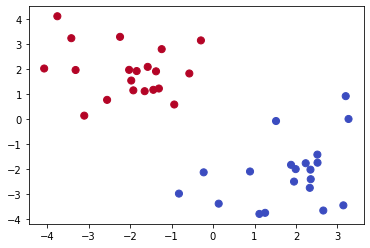

In [2]:
# Data
data1=pd.read_csv('HW2_task1.csv')
X=data1.iloc[:,:2]
Y=data1.iloc[:,2]
plt.gca()
plt.scatter(X.iloc[:,0], X.iloc[:,1], s=50, c=Y, cmap=plt.cm.get_cmap('coolwarm', 2))
plt.show()

#### a. Report the separating hyperplane (line).

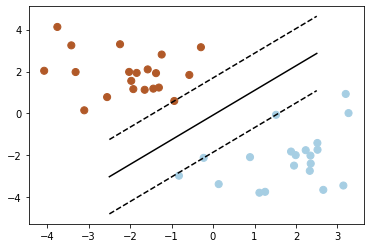

In [3]:
clf = svm.SVC(kernel='linear', C=100000)  
clf.fit(X, Y)

# Calculating Hyperlane
w = clf.coef_[0]
a = -w[0] / w[1]
x1 = np.linspace(-2.5, 2.5)
x2 = a * x1 - (clf.intercept_[0]) / w[1]

# Margins from hyperlane
bd = clf.support_vectors_[0]
x2_down = a * x1 + (bd[1] - a * bd[0])

ba = clf.support_vectors_[-1]
x2_up = a * x1 + (ba[1] - a * ba[0])

# Plot the Line
plt.gca()
plt.plot(x1, x2, 'k-')
plt.plot(x1, x2_down, 'k--')
plt.plot(x1, x2_up, 'k--')

plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=50, facecolors='none')
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=Y, cmap=plt.cm.Paired,s=50)

plt.axis('tight')
plt.show()

#### b. List the support vectors.

In [4]:
# your code here
print("Support vectors below the hyperlane:",bd)
print("\nSupport vectors above the hyperlane:",ba)

Support vectors below the hyperlane: [-0.22627536 -2.11810965]

Support vectors above the hyperlane: [-0.93564585  0.5969359 ]


#### c. Calculate the upper and lower hyperplanes (lines) of the margin.

In [23]:
# your code here
print("Lower lane margin:\n",x2_down)
print("\nUpper lane margin:\n",x2_up)

Lower lane margin:
 [-4.79404062 -4.67394948 -4.55385834 -4.43376721 -4.31367607 -4.19358493
 -4.07349379 -3.95340265 -3.83331151 -3.71322037 -3.59312923 -3.47303809
 -3.35294696 -3.23285582 -3.11276468 -2.99267354 -2.8725824  -2.75249126
 -2.63240012 -2.51230898 -2.39221784 -2.2721267  -2.15203557 -2.03194443
 -1.91185329 -1.79176215 -1.67167101 -1.55157987 -1.43148873 -1.31139759
 -1.19130645 -1.07121532 -0.95112418 -0.83103304 -0.7109419  -0.59085076
 -0.47075962 -0.35066848 -0.23057734 -0.1104862   0.00960493  0.12969607
  0.24978721  0.36987835  0.48996949  0.61006063  0.73015177  0.85024291
  0.97033405  1.09042518]

Upper lane margin:
 [-1.2441418  -1.12405066 -1.00395952 -0.88386838 -0.76377724 -0.6436861
 -0.52359497 -0.40350383 -0.28341269 -0.16332155 -0.04323041  0.07686073
  0.19695187  0.31704301  0.43713415  0.55722529  0.67731642  0.79740756
  0.9174987   1.03758984  1.15768098  1.27777212  1.39786326  1.5179544
  1.63804554  1.75813667  1.87822781  1.99831895  2.1184100

#### d. Compute the width of the margin.

In [31]:
# your code here
# Come back to this section
print("Total margin width:",2*a)

Total margin width: 1.901299661253516


#### e. What would you expect to happen to the margin if the constant C was made very small?

With very small <em>constant C</em>, the accuracy of calculating the hyperplane and margin would be low. There would be an increase in error values with "unequal" hyperplane between the seperation. <br> See graph below...

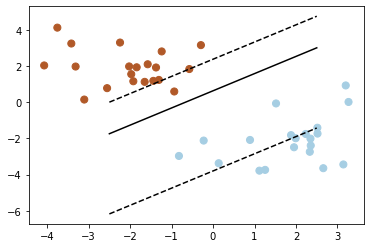

In [28]:
clf = svm.SVC(kernel='linear', C=0.000000001)  
clf.fit(X, Y)

# Calculating Hyperlane
w = clf.coef_[0]
a = -w[0] / w[1]
x1 = np.linspace(-2.5, 2.5)
x2 = a * x1 - (clf.intercept_[0]) / w[1]

# Margins from hyperlane
bd = clf.support_vectors_[0]
x2_down = a * x1 + (bd[1] - a * bd[0])

ba = clf.support_vectors_[-1]
x2_up = a * x1 + (ba[1] - a * ba[0])

# Plot the Line
plt.gca()
plt.plot(x1, x2, 'k-')
plt.plot(x1, x2_down, 'k--')
plt.plot(x1, x2_up, 'k--')

plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=50, facecolors='none')
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=Y, cmap=plt.cm.Paired,s=50)

plt.axis('tight')
plt.show()

## Task 2 (4+8+8=20 pts)

### Given the dataset provided below, answer the following questions:

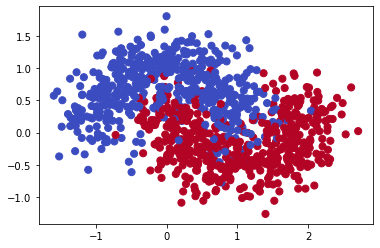

In [32]:
# Data 
data2=pd.read_csv('HW2_task2.csv')
X=data2.iloc[:,:2]
Y=data2.iloc[:,2]

plt.gca()
plt.scatter(X.iloc[:,0], X.iloc[:,1], s=50, c=Y, cmap=plt.cm.get_cmap('coolwarm', 2));
plt.show()

# Generate training (X_train, Y_train) and testing (X_test, Y_test) datasets for out of sample test
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=1)

### a. Train a polynomial SVM using the training set. Use the default arguments, and report both in-sample (training set) and out-of-sample (test set) classification accuracy.

In [35]:
# Defualt degree = 2 
clf = svm.SVC(kernel='poly',degree=2) 
clf.fit(X, Y)

SVC(degree=2, kernel='poly')

In [36]:
print("In sample, we successfully predict {} percent of the data".format((Y==clf.predict(X)).sum()*100/len(Y)))

In sample, we successfully predict 72.5 percent of the data


In [37]:
# Let's see how we do out of sample, dividing the dataset into training and test, and averaging over 10 random splits.
from sklearn.model_selection import train_test_split
OS = []
for i in range(10):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=i)
    clf = svm.SVC(kernel='poly',degree=2) 
    clf.fit(X_train, Y_train)

    correct=1.0*(clf.predict(X_test)==Y_test).sum()/len(Y_test)
    OS.append(correct)
    
print("Out of sample, we successfully predict {} percent of the data".format((np.mean(correct))*100))

Out of sample, we successfully predict 71.81818181818181 percent of the data


C:\Users\Jeff\anaconda3\envs\ds\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


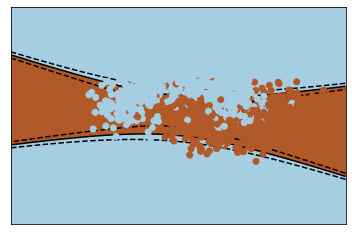

In [39]:
# your code here
# Plot the line, the points, and the nearest vectors to the plane

plt.clf()
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=80,
            facecolors='none', zorder=10)
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=Y, zorder=10, cmap=plt.cm.Paired)
################################################################################
plt.axis('tight')
x_min = -3
x_max = 3
y_min = -3
y_max = 3

XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])

# Put the result into a color plot
Z = Z.reshape(XX.shape)

plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired, shading = 'auto')
plt.contour(XX, YY, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'],
            levels=[-.5, 0, .5])

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

plt.xticks(())
plt.yticks(())
plt.show()

### Next we will use the validation subset in order to pick the optimal parameters for the polynomial model.

### b. Try polynomials of degree 1,2,3,4. For each degree, consider a variety of regularization constants from the range C=[math.exp(i) for i in np.linspace(-10,2*degree,200)] in order to evaluate the classifier performance over the validation set defined below.  Plot the graph of "Accuracy vs log(C)" for each degree.


In [ ]:
# Next we generate validation data (X_vali, Y_vali) from the training dataset. 
# Denote the remaining training data by (X_train_1, Y_train_1).
X_train_1,X_vali,Y_train_1,Y_vali = train_test_split(X_train, Y_train, test_size=0.33, random_state=99)

# your code here

### c. Choose the optimal degree and the optimal regularization constant C based on these graphs.  Use the optimal degree and C to compute and report the final out-of-sample accuracy of the best classification model selected. 

In [ ]:
# your code here

## Task 3 (5+5=10pts).

### This task is to be done by hand rather than using Python.

Assume you have a data set as below. It contains records of cars with three features: the type of the car (sports or SUV), the color of the car (red or yellow), and the origin of the car (domestic or imported). And the labels for the data are yes (car was stolen) and no (car was not stolen).

CarType,Color,Origin,Stolen?

sports,red,domestic,yes

sports,red,domestic,yes

sports,red,domestic,yes

sports,red,domestic,no

SUV,red,domestic,yes

SUV,red,imported,yes

SUV,yellow,imported,no

SUV,yellow,imported,yes

SUV,yellow,domestic,no

sports,yellow,imported,no

sports,red,imported,yes


### Questions:

a) Calculate the following sample probabilities:

P(Yes)

P(No)

P(Red|Yes)

P(SUV|Yes)

P(Domestic|Yes)

P(Red|No)

P(SUV|No)

P(Domestic|No)

b) Using naive Bayes classification, what is the probability that a red, domestic SUV will be stolen? Show your work.

## Task 4 (4+2+2+2=10pts)

Consider the following problem involving Gaussian Naive Bayes classification.  We use eight factors to predict if people have diabetes or not. The variables are:

y: The label (0 - no diabetes, 1 - diabetes)

t_pre: Number of times pregnant

glu: Plasma glucose concentration a 2 hours in an oral glucose tolerance test

blood_p: Diastolic blood pressure (mm Hg)

triceps: Triceps skin fold thickness (mm)

serum: 2-Hour serum insulin (mu U/ml)

b_m: Body mass index (weight in kg/(height in m)^2)

pedigree_f: Diabetes pedigree function

age: Age (years)

### Using the data provided below, learn a Naive Bayes classifier from the training data and answer the following questions: 

In [ ]:
# Training data
data_train=pd.read_csv("HW2_task4_train.csv") 
y_train=data_train.iloc[:,1] 
X_train=data_train.iloc[:,2:] 

# Testing data
data_test=pd.read_csv("HW2_task4_test.csv")
y_test=data_test.iloc[:,1]
X_test=data_test.iloc[:,2:]

print(X_train.head())

### a) What is the prediction accuracy for Naive Bayes, both in sample (on the training data) and out of sample (on the test data)?

In [ ]:
# your code here

### b) What is the prior probability of diabetes, learned from the training data?

In [ ]:
# your code here

### c) What is the mean and variance of each input variable for patients with diabetes?

In [ ]:
# your code here

### d) What is the mean and variance of each input variable for patients without diabetes?

In [ ]:
# your code here

## Task 5 (10+15=25 pts)

We have an artificial data set split, where the training set contains both labeled and unlabeled data. Column 'y' is the label, and columns '0','1','2' are categorical variables.

In [ ]:
data_train=pd.read_csv("HW2_task5_train.csv")
y_Labeled_train=data_train.iloc[:,1] 
X_Labeled_train=data_train.iloc[:,2:] 

data_test=pd.read_csv("HW2_task5_test.csv")
y_Labeled_test=data_test.iloc[:,1]
X_Labeled_test=data_test.iloc[:,2:]

data_Unlabeled=pd.read_csv("HW2_task5_unlabeled.csv")
X_Unlabeled_train=data_Unlabeled.iloc[:,1:]

print(X_Labeled_train)
print(y_Labeled_train)

### a) Learn a discrete Naive Bayes classifier from  X_Labeled_train, use it to predict the labels of X_Labeled_test, and report the classification accuracy.

In [ ]:
# your code here

### b) Improve the classification by using the unlabeled data, data_Unlabeled and the EM algorithm to predict labels of X_Labeled_test, and report the new accuracy by EM semi-supervised algorithm (Please feel free to use code from our lab sessions or any packages you prefer). 

In [ ]:
# your code here